In [1]:


#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
#data = pd.read_csv('article_all.csv', error_bad_lines=False, encoding="cp1251");
# data = pd.read_csv('lemmatized.csv', error_bad_lines=False, encoding="cp1251");
data = pd.read_csv('cleaned_stopwords.csv', encoding="cp1251", sep='\t');
data_text = data[['out']]
#documents = data_text
#data_text['index'] = data_text.index

c:\python39\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [3]:
data_text['out']

0       изучение энцевир пря экспресссхеме нпо микроге...
1       состояние нии фармакология томский научный цен...
2       роль акушерство гинекология имя сосудистый сет...
3       фармакогенетика российский кардиологический на...
4       влияние пашинский фармакология томский научный...
                              ...                        
6146    высокий школа свет новый тенденция российский ...
6147    центр областнический 18701880-х статья анализи...
6148    идентичность когнитивноэпистемической система ...
6149    представить построение теоретический модель ко...
6150    характеризоваться деятельность сфера подготовк...
Name: out, Length: 6151, dtype: object

In [2]:
# python -m spacy download ru_core_news_sm

from IPython.display import clear_output
def lemmatization(texts, allowed_postags={"NOUN", "ADJ", "VERB", "ADV"}):
    processed_count = 0
    texts_count = len(texts)
    nlp = spacy.load("ru_core_news_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
        processed_count+=1
        clear_output(wait=True)
        print(processed_count, '/', texts_count, sep='')
    return (texts_out)

In [7]:
lemmatized_texts = lemmatization(data_text['text'])
print (lemmatized_texts[1])

1426/6207


KeyboardInterrupt: 

In [24]:
import pickle
with open('lda_model.pkl', 'wb') as outp:
    pickle.dump(lda_model, outp, pickle.HIGHEST_PROTOCOL)


In [89]:
from gensim.models import LsiModel
doc_term_matrix = [id2word.doc2bow(doc) for doc in data_words]
lsamodel = LsiModel(doc_term_matrix, num_topics=6, id2word = id2word)

In [91]:
lsamodel.print_topics()

[(0,
  '0.242*"клетка" + 0.197*"группа" + 0.175*"уровень" + 0.162*"система" + 0.162*"исследование" + 0.147*"больных" + 0.136*"активность" + 0.136*"метод" + 0.134*"являться" + 0.134*"кровь"'),
 (1,
  '-0.261*"клетка" + -0.172*"больных" + 0.147*"год" + 0.147*"информация" + 0.145*"система" + -0.145*"кровь" + 0.136*"информационныи" + -0.135*"активность" + -0.132*"группа" + 0.120*"новыи"'),
 (2,
  '-0.332*"год" + 0.296*"система" + -0.184*"больных" + 0.178*"модель" + 0.169*"клетка" + -0.139*"группа" + 0.138*"сеть" + -0.133*"ребенок" + 0.118*"информация" + -0.112*"воина"'),
 (3,
  '0.441*"клетка" + -0.300*"больных" + 0.209*"мышь" + -0.208*"группа" + 0.152*"животное" + -0.147*"ребенок" + -0.143*"система" + -0.139*"уровень" + -0.125*"пациент" + -0.111*"лечение"'),
 (4,
  '0.388*"информационныи" + 0.318*"информация" + 0.163*"социальныи" + 0.162*"библиотека" + 0.161*"общество" + -0.125*"год" + 0.125*"человек" + 0.123*"культура" + 0.117*"коммуникация" + -0.107*"сооружение"'),
 (5,
  '-0.443*"агент

In [3]:
mx = 0
for i in data_text['out']:
    length = len(i.split())
    mx += length
print(mx/len(data_text['out']))

1260.7397171191676


In [19]:
import spacy
#loading the english language small model of spacy
en = spacy.load('ru_core_news_sm')
stopwords = en.Defaults.stop_words

print(len(stopwords))
print(stopwords)

264
{'мой', 'него', 'одном', 'саму', 'своей', 'когда', 'всему', 'одним', 'оне', 'только', 'ней', 'всего', 'своего', 'ест', 'еще', 'ем', 'такая', 'такое', 'им', 'том', 'такие', 'тот', 'ела', 'которое', 'мне', 'собой', 'если', 'может', 'моя', 'моем', 'могла', 'этой', 'моими', 'которые', 'до', 'всеми', 'и', 'могу', 'самом', 'можешь', 'нас', 'эту', 'то', 'ты', 'все', 'одною', 'само', 'одних', 'нашей', 'ей', 'свои', 'наши', 'своих', 'такою', 'которого', 'которую', 'которая', 'за', 'тебе', 'своём', 'ко', 'которой', 'одну', 'томах', 'всех', 'сами', 'вот', 'мою', 'о', 'чём', 'моего', 'самими', 'тобою', 'мной', 'будешь', 'моему', 'наш', 'нашею', 'своем', 'та', 'этими', 'едят', 'я', 'да', 'быть', 'или', 'моих', 'ими', 'такую', 'мое', 'чтобы', 'это', 'такой', 'весь', 'ним', 'меня', 'одному', 'всею', 'которых', 'таких', 'можете', 'моей', 'уже', 'таким', 'наса', 'но', 'что', 'этим', 'нашего', 'будете', 'всем', 'своему', 'самим', 'той', 'тебя', 'емъ', 'такими', 'ещё', 'свой', 'к', 'этою', 'они', 'по

In [ ]:
import spacy
import pandas as pd

# Load spacy model
en = spacy.load('ru_core_news_sm')
stopwords = en.Defaults.stop_words      

# # New stop words list 
# customize_stop_words = [
#     'attach'
# ]

# # Mark them as stop words
# for w in customize_stop_words:
#     nlp.vocab[w].is_stop = True

import swifter
def delete_stopwords(text):
    return ' '.join([token.lemma_ for token in en(text) if not token.is_stop])



# Test data
dff = pd.DataFrame( {'Sumcription': ["я ты она делать",
                                   "вы мы кот и я"]})

# Convert each row into spacy document and return the lemma of the tokens in 
# the document if it is not a sotp word. Finally join the lemmas into as a string
data_text['out'] = data_text['text'].swifter.apply(delete_stopwords)

print (data_text)

In [2]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(data_text['out'])

print (data_words[0][0:20])

['изучение', 'энцевир', 'пря', 'экспресссхеме', 'нпо', 'микрогеннпо', 'вирион', 'гиск', 'заболеваемость', 'клещевои', 'энцефалит', 'продолжать', 'оставаться', 'актуальныи', 'здравоохранение', 'основныи', 'средство', 'защита', 'клещевои', 'энцефалит']


In [28]:
# Import package
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.savefig('foo.png')
    plt.axis("off");

In [22]:
data_text['out'].values[6120]

'идентичность когнитивноэпистемической система культурология кабардинобалкарский государственный университет статья посвятить проблема формирование теоретический культурология категориальный язык объяснительный принцип контекст идеяпринцип идентичность рассматриваться качество базовый объяснительный принцип информационныйсемиотический теория культура ключевой слово культура культурология информационныйсемиотический теория культура язык наука идентичность типология идентичность операциональность идентичность социальный информация субъектность отношение российский культурология ныне подъём попрежнему неоднозначный упрекать несоответствие современный критерий научность вряд можно считать культурология отдельный научный дисциплина наряду философия этнология прочими точно природоведение распадаться условно физика химия биология культурология мыслится скорее качество сквозной тема различный социальный гуманитарный наука таково мнение лидер современный российский философия иначе аргументирова

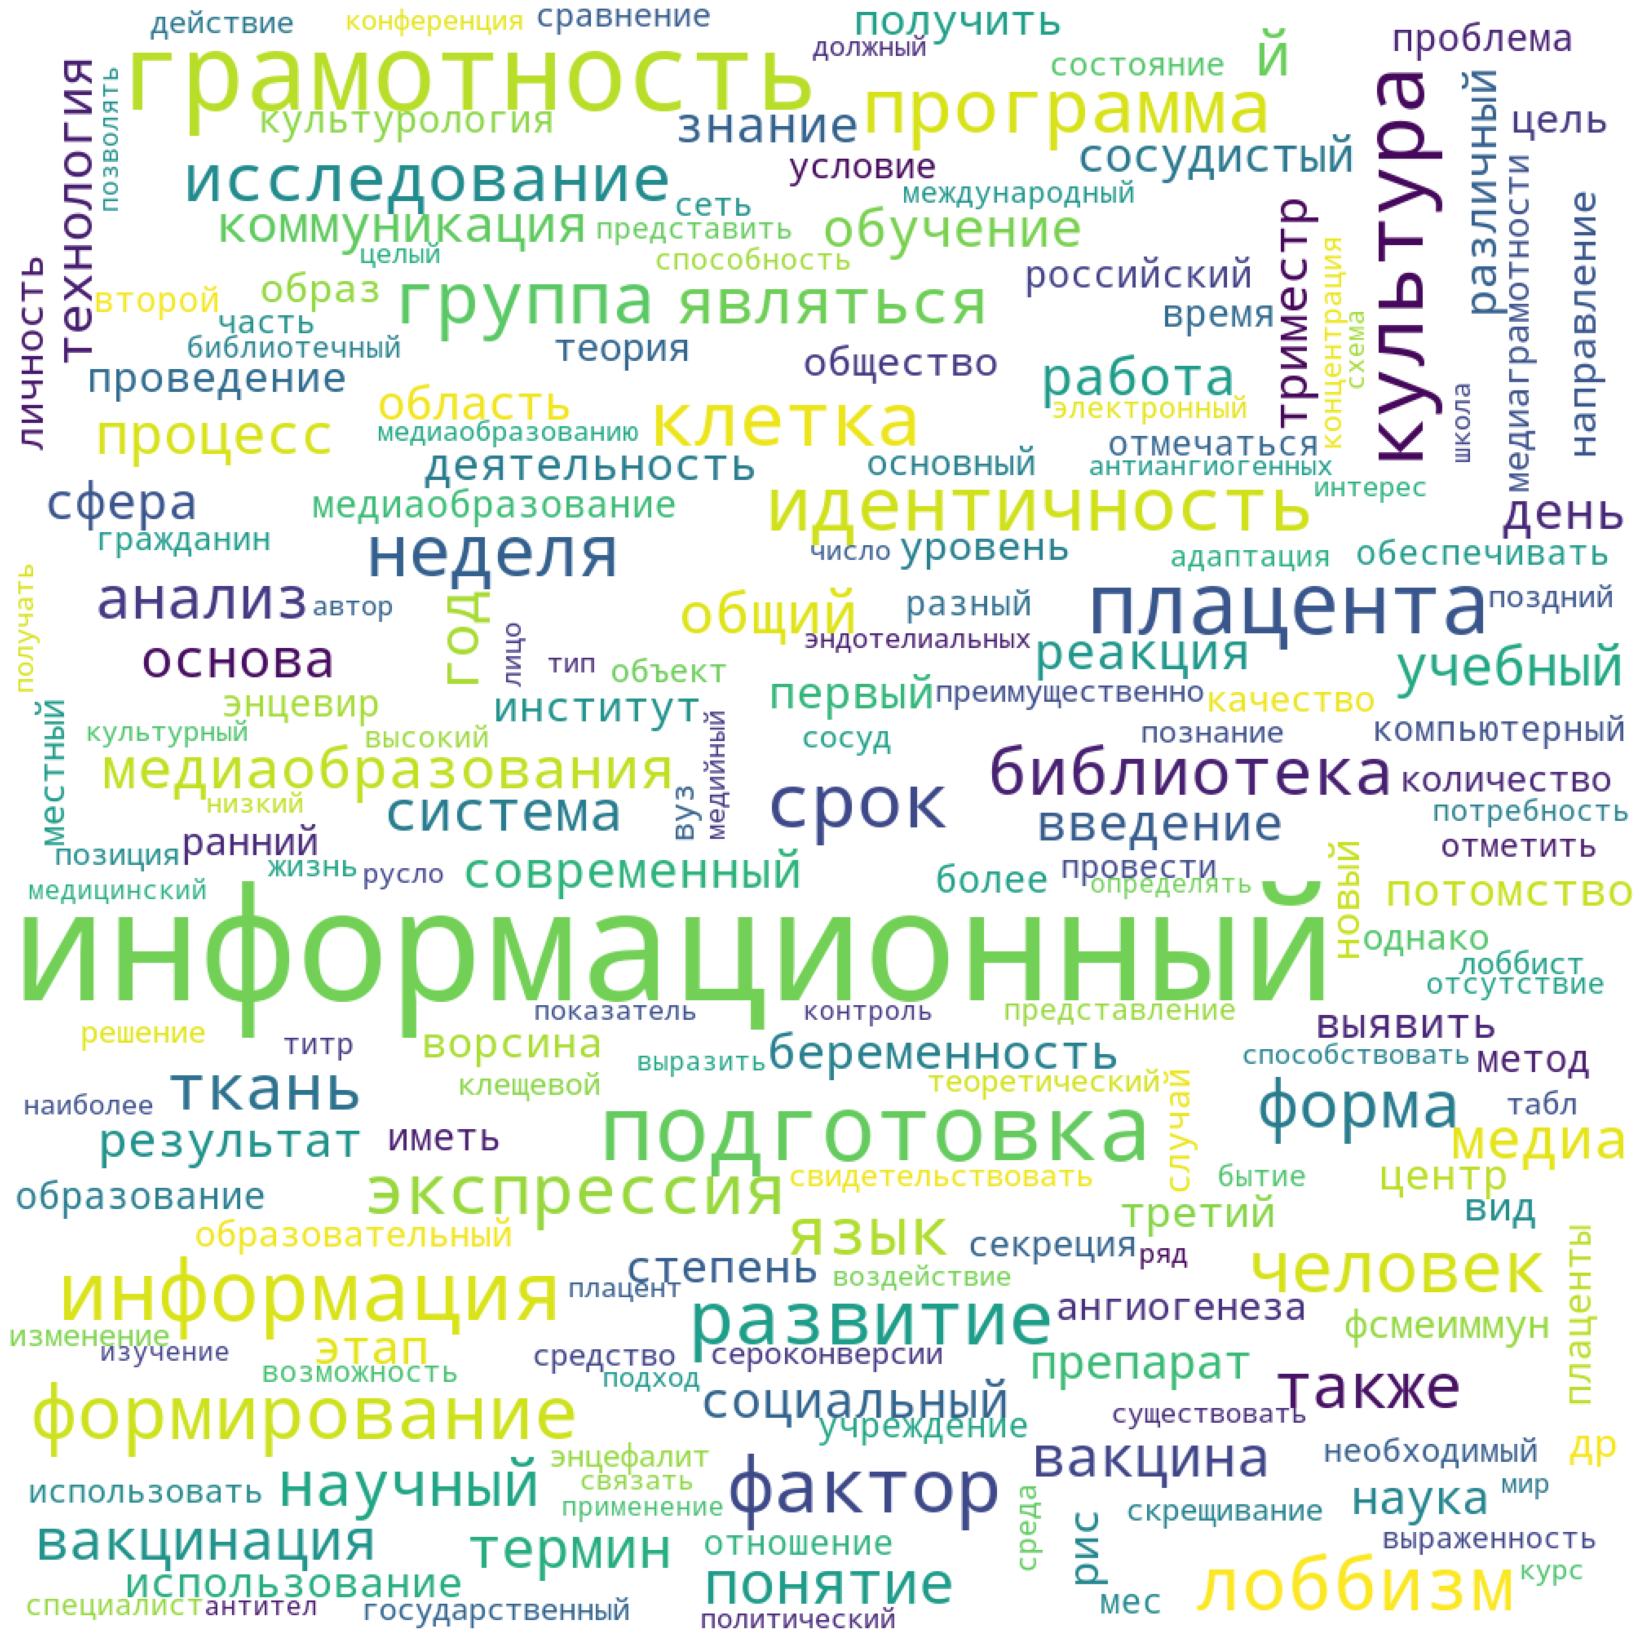

In [29]:
text = data_text['out'].values 

wordcloud = WordCloud(width= 1000,
    height = 1000,
    random_state=1,
    background_color='white',
    #colormap='Pastel1',
    collocations=False,).generate(str(text))
plot_cloud(wordcloud)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

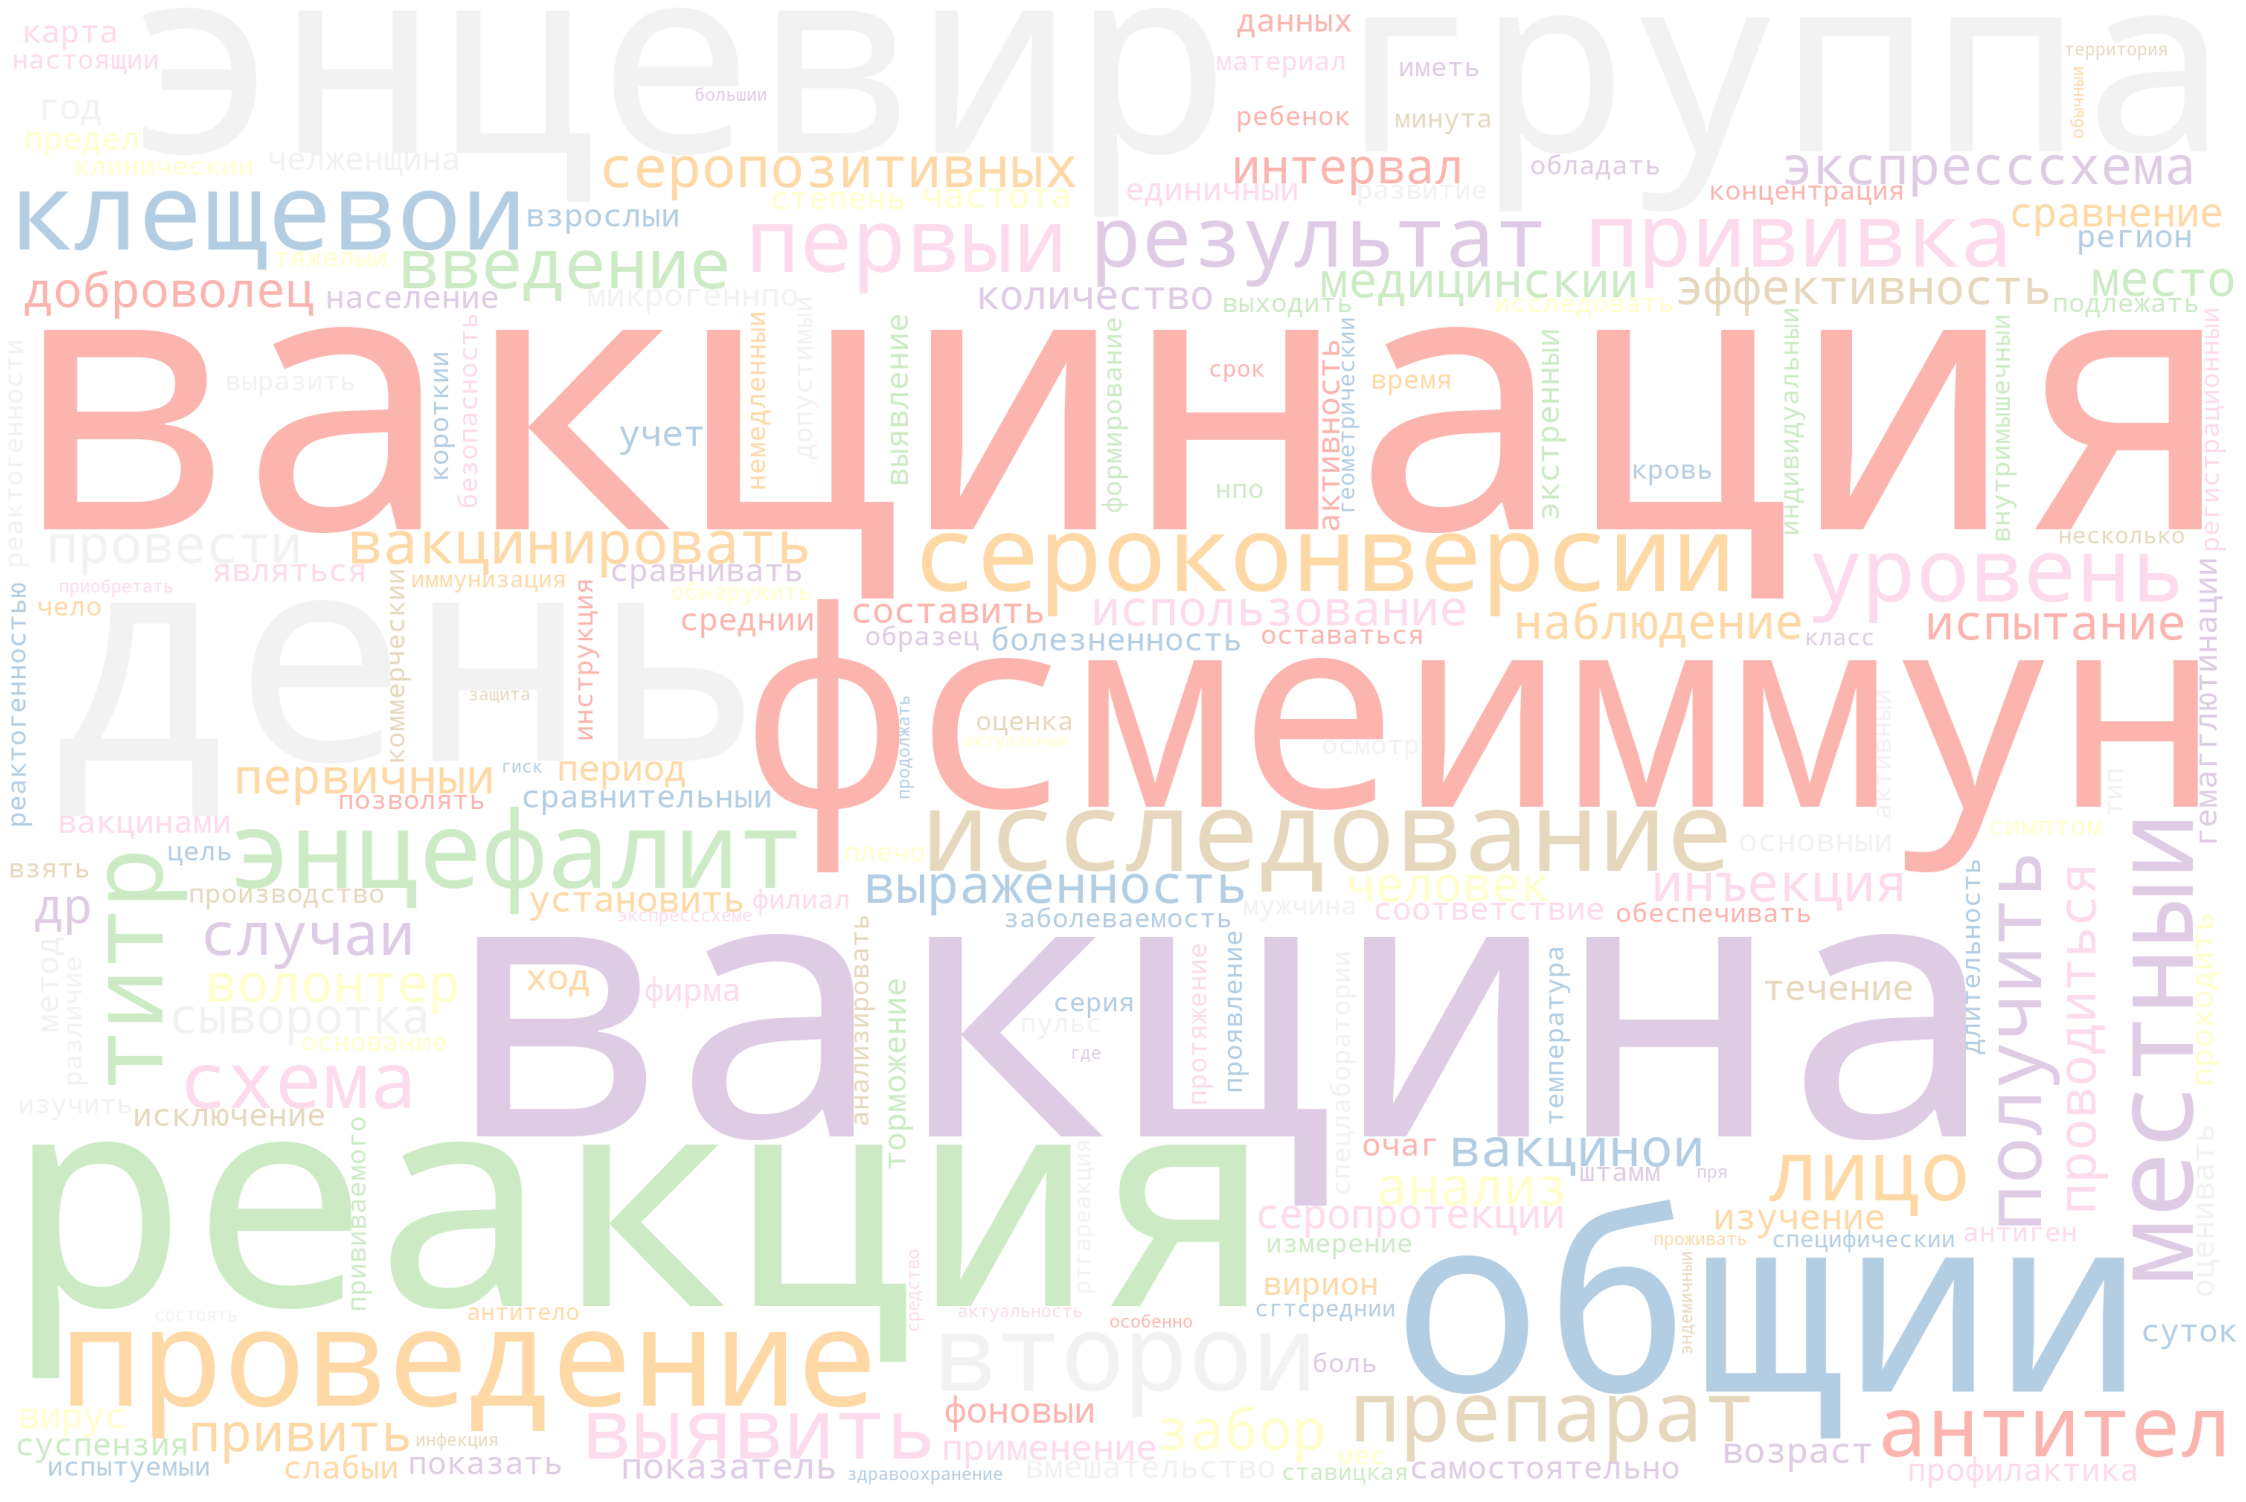

In [26]:
# Import package
from wordcloud import WordCloud, STOPWORDS# Generate word cloud
wordcloud = WordCloud(
    width= 3000,
    height = 2000,
    random_state=1,
    background_color='white',
    colormap='Pastel1',
    collocations=False,
    stopwords = STOPWORDS).generate(' '.join(data_words[0]))# Plot

plot_cloud(wordcloud)

# Bigrams and Trigrams

In [3]:
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold = 100)
bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)



In [60]:
data_bigrams_trigrams[5000]

['учет',
 'фильтрационныи_анизотропия',
 'строительство',
 'лессовыи',
 'макропористыи_грунт',
 'доказать',
 'важность',
 'учет',
 'фактор',
 'фильтрационныи_анизотропия',
 'расчет',
 'основание',
 'фундамент',
 'лессовидныи',
 'макропористыи_грунт',
 'предложить',
 'способ',
 'учет',
 'степень',
 'фильтрационныи_анизотропия',
 'теория',
 'фильтрационныи',
 'консолидация',
 'помощь',
 'введение',
 'поправочныи_коэффициент',
 'фильтрационныи_анизотропия',
 'ключевои_слово',
 'лессовидныи',
 'макропористыи_грунт',
 'фильтрационныи_анизотропия',
 'теория',
 'фильтрационныи',
 'консолидация',
 'вопрос',
 'повышение',
 'эффективность',
 'строительство',
 'существенно',
 'важныи',
 'являться',
 'метод',
 'проектирование',
 'основание',
 'фундамент',
 'стоимость',
 'устроиство',
 'доходить',
 'стоимость',
 'здание_сооружение',
 'сложность',
 'условие',
 'площадка',
 'строительство',
 'уникальность',
 'современныи',
 'сооружение',
 'повышение',
 'технологическии',
 'нагрузка',
 'этажность',
 '

# Bag of Words

In [78]:
#id2word = corpora.Dictionary(data_words)

id2word = corpora.Dictionary(data_words)
corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 3), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 6), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 8), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2)]
адъювантом


In [4]:
%%time
from gensim.models.ldamulticore import LdaMulticore
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=6,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha="auto")

lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=8,
                         random_state=100,
                         chunksize=1000,
                         alpha=0.1,
                         eta=0.31,
                         passes=10)


cm = gensim.models.coherencemodel.CoherenceModel(
    model=ldamodel,
    texts=texts,
    dictionary=id2word,
    coherence='c_v')   
print(cm.get_coherence())
 



NameError: name 'corpus' is not defined

In [68]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.014*"животное" + 0.009*"исследование" + 0.007*"группа" + 0.006*"собака" + '
  '0.005*"препарат" + 0.005*"день" + 0.005*"результат" + 0.004*"показатель" + '
  '0.003*"метод" + 0.003*"количество"'),
 (1,
  '0.012*"препарат" + 0.007*"вирус" + 0.007*"инфекция" + 0.007*"метод" + '
  '0.006*"группа" + 0.006*"уровень" + 0.006*"лекарственныи" + '
  '0.006*"активность" + 0.006*"больных" + 0.005*"заболевание"'),
 (2,
  '0.018*"клетка" + 0.008*"мышь" + 0.006*"культура" + 0.005*"рис" + '
  '0.005*"активность" + 0.004*"линия" + 0.004*"являться" + 0.004*"также" + '
  '0.004*"молекула" + 0.004*"деиствие"'),
 (3,
  '0.015*"военныи" + 0.013*"воина" + 0.009*"советскии" + 0.008*"год" + '
  '0.008*"армия" + 0.005*"воиско" + 0.005*"сила" + 0.004*"подготовка" + '
  '0.004*"спортивныи" + 0.004*"красныи"'),
 (4,
  '0.012*"клетка" + 0.012*"группа" + 0.012*"больных" + 0.009*"уровень" + '
  '0.009*"кровь" + 0.007*"показатель" + 0.007*"исследование" + '
  '0.006*"активность" + 0.006*"иммунныи" + 0.006*"

In [66]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

c:\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.190077 -0.113645       1        1  27.095085
5     -0.055197 -0.225645       2        1  24.020297
7     -0.278001 -0.004673       3        1  15.714079
0      0.028332  0.046975       4        1   9.496165
4      0.179476 -0.072415       5        1   7.862213
8      0.169717  0.006138       6        1   4.384611
2      0.079635  0.161620       7        1   3.323611
1      0.114465 -0.089931       8        1   3.265257
3     -0.223667  0.152441       9        1   2.885167
9      0.175319  0.139134      10        1   1.953514, topic_info=              Term          Freq         Total Category  logprob  loglift
149         клетка  15716.000000  15716.000000  Default  30.0000  30.0000
83          группа  24062.000000  24062.000000  Default  29.0000  29.0000
544       животное  12153.000000  12153.000000  Default  28.0000  28.0000
144   исследование  25417.000000  25417.000000  Default  27.0000  27.0000
79             год  29094.000000  29094.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
323       развитие    364.016357  18226.649187  Topic10  -5.9826   0.0221
1096     структура    322.224757   9233.690056  Topic10  -6.1045   0.5802
1131         форма    325.228381  11720.862997  Topic10  -6.0953   0.3509
410            тип    308.996672   9216.149344  Topic10  -6.1465   0.5402
187       механизм    303.623065   5700.958276  Topic10  -6.1640   1.0029

[957 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
3206       1  0.108600       xix
3206       2  0.000424       xix
3206       3  0.886616       xix
3206       4  0.002121       xix
3206       5  0.000424       xix
...      ...       ...       ...
15579      4  0.008233  японскии
15579      5  0.001372  японскии
15579      6  0.015095  японскии
15579      9  0.627116  японскии
15579     10  0.001372  японскии

[3936 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 8, 1, 5, 9, 3, 2, 4, 10])

# TF-IDF


In [5]:
# TF-IDF
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)    

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words = []
words_missing_in_tfidf = []

# for i in range(len(corpus)):
#     bow = corpus[i]
#     low_value_words = []
#     tfidf_ids = [id for id, value in tfidf[bow]]
#     bow_ids = [id for id, value in bow]
#     low_values_words = [id for id, value in tfidf[bow] if value < low_value]
#     drops = low_value_words + words_missing_in_tfidf
#     for item in drops:
#         words.append(id2word[item])
#     words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids]
    
#     new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
#     corpus[i] = new_bow

[(0, 1), (1, 3), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 6), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 5), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2)]


# Save dict

In [57]:
id2word.save("dictionary.gensim")


In [79]:
%%time
k = 6
a = 0.1
b = 0.61
passes = 10


for k in range(6, 20):
    lda_model = compute_coherence_values(
    corpus=corpus,
    dictionary=id2word,
    k=k,
    a=a,
    b=b,
    passes=passes)

    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=texts,
        dictionary=id2word,
        coherence='c_v')
    print(k, coherence_model_lda.get_coherence())

6 0.4697820650917932
7 0.46998075288225666
8 0.48237583715904
9 0.5012301519849096
10 0.4934257331771198
11 0.4697820261079251
12 0.44367204106229985
13 0.42049031163512574
14 0.44902564323281835
15 0.43261157231970226
16 0.40666503166309087
17 0.3903061649130879
18 0.3869522087388028
19 0.4002153430353935
Wall time: 42min 16s


In [91]:
import multiprocessing
multiprocessing.cpu_count()

8

In [90]:
%%time
import urllib.request
from concurrent.futures import ThreadPoolExecutor
urls = [
  'http://www.python.org',
  'https://docs.python.org/3/',
  'https://docs.python.org/3/whatsnew/3.7.html',
  'https://docs.python.org/3/tutorial/index.html',
  'https://docs.python.org/3/library/index.html',
  'https://docs.python.org/3/reference/index.html',
  'https://docs.python.org/3/using/index.html',
  'https://docs.python.org/3/howto/index.html',
  'https://docs.python.org/3/installing/index.html',
  'https://docs.python.org/3/distributing/index.html',
  'https://docs.python.org/3/extending/index.html',
  'https://docs.python.org/3/c-api/index.html',
  'https://docs.python.org/3/faq/index.html'
  ]



with ThreadPoolExecutor(32) as executor:
    results = executor.map(urllib.request.urlopen, urls)


Wall time: 427 ms


In [84]:
lda_model.print_topics(-1)

[(0,
  '0.008*"животное" + 0.005*"исследование" + 0.003*"препарат" + 0.003*"год" + 0.002*"собака" + 0.002*"птица" + 0.002*"результат" + 0.002*"теленок" + 0.002*"вид" + 0.002*"являться"'),
 (1,
  '0.007*"год" + 0.005*"человек" + 0.004*"новыи" + 0.004*"общество" + 0.004*"время" + 0.004*"социальныи" + 0.003*"стать" + 0.003*"развитие" + 0.003*"культура" + 0.003*"работа"'),
 (2,
  '0.009*"группа" + 0.008*"клетка" + 0.007*"исследование" + 0.006*"уровень" + 0.005*"больных" + 0.005*"результат" + 0.005*"животное" + 0.005*"активность" + 0.005*"препарат" + 0.004*"метод"'),
 (3,
  '0.001*"облицовка" + 0.000*"земля" + 0.000*"фиванец" + 0.000*"кооперация" + 0.000*"система" + 0.000*"год" + 0.000*"земельныи" + 0.000*"бетон" + 0.000*"время" + 0.000*"афинянин"'),
 (4,
  '0.003*"производство" + 0.002*"выпуск" + 0.002*"препарат" + 0.002*"объем" + 0.001*"предприятие" + 0.001*"раз" + 0.001*"оао" + 0.001*"год" + 0.001*"упаковка" + 0.001*"лекарственныи_средство"'),
 (5,
  '0.011*"система" + 0.006*"работа" + 0

In [56]:
lda_model.save('lda_model.gensim')

In [63]:
new_doc='''СОВРЕМЕННОЕ НАПРАВЛЕНИЕ РАЗВИТИЯ РЕКОМЕНДАТЕЛЬНЫХ СИСТЕМ ДЛЯ ЭЛЕКТРОННЫХ ДОКУМЕНТОВ

Рекомендательные системы - это такие программные средства и методы, предоставляющие рекомендации предметов, которые могли бы оказаться полезными для пользователя. Рекомендации могут касаться совершенно различных областей принятия решений, например, таких как, какой предмет купить, какую музыку послушать, какие новости прочесть.

Разработка рекомендательных систем была инициирована из достаточно простого наблюдения - люди часто полагаются на рекомендации для решения обычных повседневных задач. Например, при выборе книги для чтения полагаются на советы сверстников; работодатели учитывают рекомендательные письма в рекрутинговых решения; при выборе фильма люди часто полагаются на обзоры и мнения кинокритиков, и т. д.
В попытках имитировать это поведение, первые алгоритмы рекомендательных систем использовали рекомендации сообщества пользователей для предоставления рекомендаций конкретному пользователю. Рекомендовались те предметы, которые нравились похожим пользователям. Этот подход получил название коллаборативной фильтрации и его обоснование состоит в том, что если пользователь согласился в прошлом с другими пользователями, то и другие рекомендации, исходящие от этих пользователей, должны быть для него актуальны.

С развитием веб-сайтов электронной коммерции возникла необходимость предоставления рекомендаций, полученных в результате фильтрации всего ассортимента. Пользователям было трудно сделать самостоятельный выбор из огромного разнообразия предметов или услуг. Рекомендательные системы показали себя как эффективное средство решения проблемы информационной перегрузки.

Помимо коллаборативной фильтрации, которая формирует рекомендации на основе мнения других пользователей, существует подход формирования рекомендаций на основе оценённых пользователем предметов. Каждый предмет в коллекции имеет определённое число атрибутов, характеризующих этот предмет, которые могут быть использованы для других, похожих на него предметов. Такие системы получили название рекомендательные системы, основанные на содержании.'''

In [64]:
cleaned = gen_words([new_doc])
cleaned

[['современное',
  'направление',
  'развития',
  'систем',
  'для',
  'электронных',
  'документов',
  'системы',
  'это',
  'такие',
  'программные',
  'средства',
  'методы',
  'предоставляющие',
  'рекомендации',
  'предметов',
  'которые',
  'могли',
  'бы',
  'оказаться',
  'полезными',
  'для',
  'пользователя',
  'рекомендации',
  'могут',
  'касаться',
  'совершенно',
  'различных',
  'областеи',
  'принятия',
  'решении',
  'например',
  'таких',
  'как',
  'какои',
  'предмет',
  'купить',
  'какую',
  'музыку',
  'послушать',
  'какие',
  'новости',
  'прочесть',
  'разработка',
  'систем',
  'была',
  'инициирована',
  'из',
  'достаточно',
  'простого',
  'наблюдения',
  'люди',
  'часто',
  'полагаются',
  'на',
  'рекомендации',
  'для',
  'решения',
  'обычных',
  'повседневных',
  'задач',
  'например',
  'при',
  'выборе',
  'книги',
  'для',
  'чтения',
  'полагаются',
  'на',
  'советы',
  'сверстников',
  'работодатели',
  'учитывают',
  'письма',
  'рекрутинговых

In [65]:
bow = lda_model.id2word.doc2bow(cleaned[0])
bow

[(97, 1),
 (381, 1),
 (531, 2),
 (574, 1),
 (634, 1),
 (667, 1),
 (790, 1),
 (1298, 2),
 (1435, 2),
 (2126, 1),
 (2143, 1),
 (2201, 2),
 (2222, 3),
 (2253, 1),
 (2617, 1),
 (2735, 1),
 (2756, 1),
 (2893, 1),
 (2895, 1),
 (3503, 2),
 (4546, 1),
 (6733, 1),
 (8430, 2),
 (8632, 1),
 (10140, 1),
 (14768, 7),
 (15381, 2),
 (16346, 1),
 (19040, 1),
 (19603, 1),
 (19711, 1),
 (21041, 7),
 (22218, 1),
 (23960, 1),
 (25590, 1),
 (26591, 1),
 (30762, 3),
 (31328, 1),
 (32896, 1),
 (35196, 1),
 (36323, 1),
 (36468, 1),
 (36902, 1),
 (38728, 1),
 (39127, 1),
 (42431, 1),
 (45266, 1),
 (46044, 1),
 (46206, 2),
 (47521, 4),
 (47721, 3),
 (50661, 1),
 (51883, 1),
 (54672, 1),
 (54837, 1),
 (54993, 1),
 (55243, 1),
 (67249, 9),
 (67272, 1),
 (77461, 1),
 (79109, 1),
 (79581, 1),
 (85354, 1),
 (85910, 2),
 (86166, 1),
 (99231, 1),
 (99340, 1),
 (101630, 1),
 (102125, 1),
 (104707, 1),
 (105372, 1),
 (105610, 1),
 (107333, 1),
 (114191, 1),
 (114342, 1),
 (116954, 1),
 (122898, 1),
 (124828, 1),
 (12485

In [77]:
lda_model[corpus][0]

[(0, 0.713223), (2, 0.2863862)]

In [67]:
lda_model.print_topics()

[(0,
  '0.009*"животное" + 0.007*"исследование" + 0.005*"группа" + 0.005*"собака" + 0.004*"препарат" + 0.004*"результат" + 0.003*"случаи" + 0.003*"день" + 0.003*"также" + 0.003*"являться"'),
 (1,
  '0.006*"год" + 0.005*"человек" + 0.004*"новыи" + 0.004*"социальныи" + 0.004*"общество" + 0.004*"время" + 0.003*"стать" + 0.003*"развитие" + 0.003*"культура" + 0.003*"работа"'),
 (2,
  '0.009*"клетка" + 0.009*"группа" + 0.007*"уровень" + 0.006*"исследование" + 0.006*"больных" + 0.005*"активность" + 0.004*"показатель" + 0.004*"результат" + 0.004*"метод" + 0.004*"препарат"'),
 (3,
  '0.007*"год" + 0.005*"город" + 0.004*"население" + 0.003*"территория" + 0.003*"часть" + 0.003*"раион" + 0.003*"земля" + 0.002*"первыи" + 0.002*"время" + 0.002*"военныи"'),
 (4,
  '0.005*"расчет" + 0.005*"конструкция" + 0.004*"рис" + 0.004*"работа" + 0.004*"значение" + 0.004*"нагрузка" + 0.004*"условие" + 0.003*"труба" + 0.003*"грунт" + 0.003*"температура"'),
 (5,
  '0.014*"система" + 0.006*"информация" + 0.006*"рабо

[(1, 0.47220618), (5, 0.5244057)]

In [75]:
def get_keywords(topic_num):
    wp = lda_model.show_topic(topic_num)
    topic_keywords = ", ".join([word for word, prop in wp[:3]])
    return topic_keywords

In [74]:
for (topic_num, prob) in lda_model.get_document_topics(bow):
    key_words = get_keywords(topic_num)
    print(prob, key_words)

0.47219434 год, человек, новыи
0.52441764 система, информация, работа


In [78]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b, passes):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus, #LdaMulticore
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=2000,
                                           passes=passes,
                                           alpha=a,
                                           eta=b,
                                           iterations=100)
    #lda_model.print_topics()
#     coherence_model_lda = CoherenceModel(
#         model=lda_model,
#         texts=texts,
#         dictionary=id2word,
#         coherence='c_v')
    
    return lda_model #coherence_model_lda.get_coherence()

In [79]:
import numpy as np
import tqdm

import datetime


grid = {}
grid['Validation_Set'] = {}# Topics range

min_topics = 6#2
max_topics = 10#11
step_size = 1

topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               #gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = [
    #'75% Corpus',
    '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=len(corpus_sets) * len(topics_range) * len(alpha) * len(beta))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv(f'lda_tuning_results_BoW{str(datetime.datetime.now())}.csv', index=False)
    pbar.close()


100%|███████████████████████████████████████████████████████████████████████████████████| 24/24 [10:06:52<00:00, 1517.20s/it]

 28%|██████████████████████▎                                                          | 33/120 [5:11:19<14:21:36, 594.21s/it]c:\python39\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
c:\python39\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))

100%|██████████████████████████████████████████████████████████████████████████████████| 120/120 [21:37:24<00:00, 735.79s/it]

OSError: [Errno 22] Invalid argument: 'lda_tuning_results_BoW2021-12-11 22:38:00.703238.csv'

In [80]:
pd.DataFrame(model_results).to_csv(f'lda_tuning_resultsBOW_2021-12-11-23-35-00.csv', index=False)

In [42]:
from pprint import pprint
pprint(model_results)

{'Alpha': ['symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric',
           'symmetric',
           'asymmetric'],
 'Beta': ['symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric',
          'symmetric'],
 'Coherence': [0.42879892018150884,
               0.4228332007444993,
               0.4436138801974573,
               0.4380232384130191,
               0.47361666324284357,
               0.4732004407760659,
               0.443664024

In [32]:
len(corpus)

6151

In [19]:
%%time 
from gensim.models.ldamulticore import LdaMulticore
# lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20,
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=1,
#                                            alpha="auto")


# lda_model_tfidf = LdaMulticore(corpus=corpus,
#                                id2word=id2word,
#                                num_topics=7,
#                                random_state=100,
#                                chunksize=1000,
#                                passes=10,
#                                alpha='asymmetric',
#                                decay=0.5,
#                                offset=64,
#                                eta=None,
#                                eval_every=0,
#                                iterations=100,
#                                gamma_threshold=0.001,
#                               )

lda_model_tfidf = LdaMulticore(corpus=corpus,
                               id2word=id2word,
                               num_topics=6,
                               random_state=100,
                               passes=10)

Wall time: 1min 2s


'2021-12-10 14:52:49.938717'

In [20]:
from pprint import pprint
pprint(lda_model_tfidf.print_topics())

[(0,
  '0.013*"система" + 0.007*"информация" + 0.006*"работа" + 0.005*"модель" + '
  '0.005*"являться" + 0.005*"задача" + 0.005*"информационныи" + '
  '0.005*"процесс" + 0.005*"метод" + 0.005*"решение"'),
 (1,
  '0.008*"год" + 0.003*"часть" + 0.003*"время" + 0.003*"население" + '
  '0.003*"военныи" + 0.003*"первыи" + 0.003*"также" + 0.003*"иметь" + '
  '0.003*"государственныи" + 0.002*"период"'),
 (2,
  '0.009*"информация" + 0.009*"информационныи" + 0.007*"социальныи" + '
  '0.005*"человек" + 0.005*"развитие" + 0.005*"общество" + 0.005*"новыи" + '
  '0.005*"являться" + 0.004*"процесс" + 0.004*"система"'),
 (3,
  '0.006*"система" + 0.005*"работа" + 0.004*"значение" + 0.004*"условие" + '
  '0.004*"время" + 0.004*"расчет" + 0.004*"являться" + 0.004*"результат" + '
  '0.004*"рис" + 0.004*"конструкция"'),
 (4,
  '0.007*"год" + 0.005*"человек" + 0.004*"время" + 0.004*"новыи" + '
  '0.004*"работа" + 0.004*"история" + 0.004*"русскии" + 0.004*"стать" + '
  '0.003*"общество" + 0.003*"жизнь"'),
 

In [44]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

c:\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.133169  0.130403       1        1  32.968057
5      0.142225 -0.056883       2        1  22.681283
2     -0.189251 -0.042753       3        1  18.683531
0     -0.100056 -0.032020       4        1   9.839507
3     -0.014880  0.173756       5        1   7.923491
4      0.028794 -0.172503       6        1   7.904131, topic_info=           Term          Freq         Total Category  logprob  loglift
145      клетка  12212.000000  12212.000000  Default  30.0000  30.0000
537    животное  10147.000000  10147.000000  Default  29.0000  29.0000
1053    система  32627.000000  32627.000000  Default  28.0000  28.0000
479     больных   7845.000000   7845.000000  Default  27.0000  27.0000
82       группа  21013.000000  21013.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
337   результат   1638.300990  18890.906527   Topic6  -5.8096   0.0928
372   состояние   1388.570568  10269.700068   Topic6  -5.9750   0.5369
177    материал   1295.162016   9861.476341   Topic6  -6.0446   0.5078
274    получить   1264.830881  11808.655274   Topic6  -6.0683   0.3039
459    являться   1331.606573  24343.471009   Topic6  -6.0169  -0.3681

[574 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
77459      1  0.003057  абонент
77459      2  0.987516  абонент
77459      3  0.003057  абонент
77459      4  0.003057  абонент
77459      5  0.003057  абонент
...      ...       ...      ...
80813      2  0.021873   янтарь
80813      3  0.021873   янтарь
80813      4  0.021873   янтарь
80813      5  0.940518   янтарь
80813      6  0.021873   янтарь

[2909 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 3, 1, 4, 5])

In [2]:


#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



import pandas as pd
data = pd.read_csv('article_all.csv', error_bad_lines=False, encoding="cp1251");
data_text = data[['text']]
documents = data_text
data_text['index'] = data_text.index

c:\python39\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-2-f372147989a6>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index'] = data_text.index


In [4]:
import multiprocess as mp
#import tqdm
import time
from tqdm.notebook import tqdm

import spacy
nlp = spacy.load("ru_core_news_sm", disable=["parser", "ner"])

def preworker(text, nlp):
    return [w.lemma_ for w in nlp(text)]

worker = lambda text: preworker(text, nlp)


    
def _func(text):
    
    allowed_postags = {"NOUN", "ADJ", "VERB", "ADV"}
    doc = nlp(text)
    new_text = []
    for token in doc:
        if token.pos_ in allowed_postags:
            new_text.append(token.lemma_)
    final = " ".join(new_text)
    return final
with mp.Pool(4) as p:
    r = list(tqdm(p.imap(_func, data_text['text']), total=len(data_text['text'])))

  0%|          | 0/6207 [00:00<?, ?it/s]

NameError: name 'spacy' is not defined